Data Science Project – Planning Stage (Individual)

Author: Seerat Waraich

(1) Data Description:

Dataset 1: players.csv
Number of observations: 196
Number of variables: 7
Each row represents one player.

Variables:
experience: categorical — indicates the player’s experience level (Amateur, Regular, Veteran, Pro).
subscribe: logical — TRUE/FALSE variable showing if the player subscribed to the newsletter.
hashedEmail: string — unique encrypted identifier for each player.
played_hours: numeric — total number of hours each player has played.
name: string — player’s chosen username.
gender: categorical — self-reported gender of the player.
Age: numeric — age of the player in years.

Summary statistics (rounded to 2 decimal places):
Mean played_hours: 7.21 hours
Standard deviation of played_hours: 9.84 hours
Minimum played_hours: 0.00 hours
Maximum played_hours: 50.40 hours
Mean Age: 18.74 years
Standard deviation of Age: 5.21 years
Minimum Age: 8.00 years
Maximum Age: 35.00 years
Missing values: 2 missing Age entries

Data quality issues:
Some players have 0 hours of playtime, which could mean they never logged in or data was not recorded correctly.
Two Age values are missing.
experience and gender are categorical and may need conversion to factor type for analysis.
The method used to assign experience level is not specified (self-reported or system-defined).
Potential unseen issues:
Possible inconsistencies in how played_hours was measured (manual entry vs. automated logging).
Shared or duplicate accounts could distort individual statistics.
Survey-based information (such as gender or experience) could include bias or reporting errors.
How data were collected:
Likely gathered through a combination of in-game activity tracking and player registration information.
Each record corresponds to a unique player profile recorded on the server.

Dataset 2: sessions.csv

Number of observations: 1,535
Number of variables: 5
Each row represents one gameplay session (a single login–logout event).

Variables:
hashedEmail: string — encrypted identifier used to match sessions with players.
start_time: string — time when a session started (format: “DD/MM/YYYY HH:MM”).
end_time: string — time when a session ended (same format as start_time).
original_start_time: numeric — UNIX timestamp version of session start time.
original_end_time: numeric — UNIX timestamp version of session end time.

Summary statistics and structure:
Total sessions: 1,535
Missing values: 2 missing end times (end_time and original_end_time).
Each player can appear multiple times (one row per session).
Timestamps recorded between May and July 2024 (approximate range).

Data quality issues:
A few sessions have missing or incomplete end times, which will need cleaning.
Potential for negative or zero durations if times were logged incorrectly.
Time zone information is not provided.
Players with no session records will not appear in this dataset.

Potential unseen issues:
Sessions may include idle or AFK (away-from-keyboard) time, inflating playtime duration.
Server time drift or resets could slightly misalign timestamps.
Some sessions might represent reconnections after disconnections rather than new gameplay.
How data were collected:
Automatically recorded from the server’s login and logout logs.
start_time and end_time represent when a player connects and disconnects.
original_start_time and original_end_time are automatically generated UNIX timestamps.

Broad Question:
Which types of players contribute the most overall playtime on the Minecraft research server?

Specific Question:
Do more experienced players tend to spend more total time playing than less experienced ones?

Variables
Response variable (Y): total playtime (in minutes) - represents how long each player spends playing overall.
Explanatory variables (X): player experience level (Amateur, Regular, Veteran, Pro), and possibly demographic factors such as age and gender.

How the Data Will Address the Question:
The dataset includes both player demographic information (players.csv) and detailed session logs (sessions.csv). By combining these datasets using the shared hashedEmail identifier, total playtime for each player can be calculated by summing all session durations. Once the total playtime is computed, it can be compared across different experience levels to see whether higher-experience players tend to play longer overall. Additional variables such as Age and gender can be used to explore whether demographic factors also relate to total playtime.

Planned Data Wrangling Steps
Convert start_time and end_time in sessions.csv to proper datetime format.
Calculate session_length as the time difference between start and end times (in minutes).
Remove any sessions with missing or invalid durations.
Sum the total session lengths for each player to find their total playtime.
Merge the resulting totals with the player demographic data from players.csv.
The final tidy dataset will contain one row per player with their total playtime, experience level, and demographic information, ready for analysis.

In [6]:
#Data Loading and Initial Wrangling
# Load the tidyverse package (includes readr, dplyr, ggplot2)
library(tidyverse)

# Read both datasets using relative paths

sessions <- read_csv("sessions.csv")
players <- read_csv("players.csv")

# Inspect the data
head(players)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [7]:
# Minimum Wrangling to Create a Tidy Dataset
#Create a session length in minutes
sessions <- sessions |>
  mutate(session_length = as.numeric(difftime(end_time, start_time, units = "mins")))

# Remove missing or negative durations
sessions <- sessions |>
  filter(!is.na(session_length) & session_length > 0)

# Compute total playtime per player
total_time <- sessions |>
  group_by(hashedEmail) |>
  summarize(total_play_minutes = sum(session_length, na.rm = TRUE))

# Merge with players data
tidy_data <- players |>
  left_join(total_time, by = "hashedEmail") |>
  mutate(total_play_minutes = replace_na(total_play_minutes, 0))


In [8]:
#Mean Values for Quantitative Variables
players |>
  summarize(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2)
  )


mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


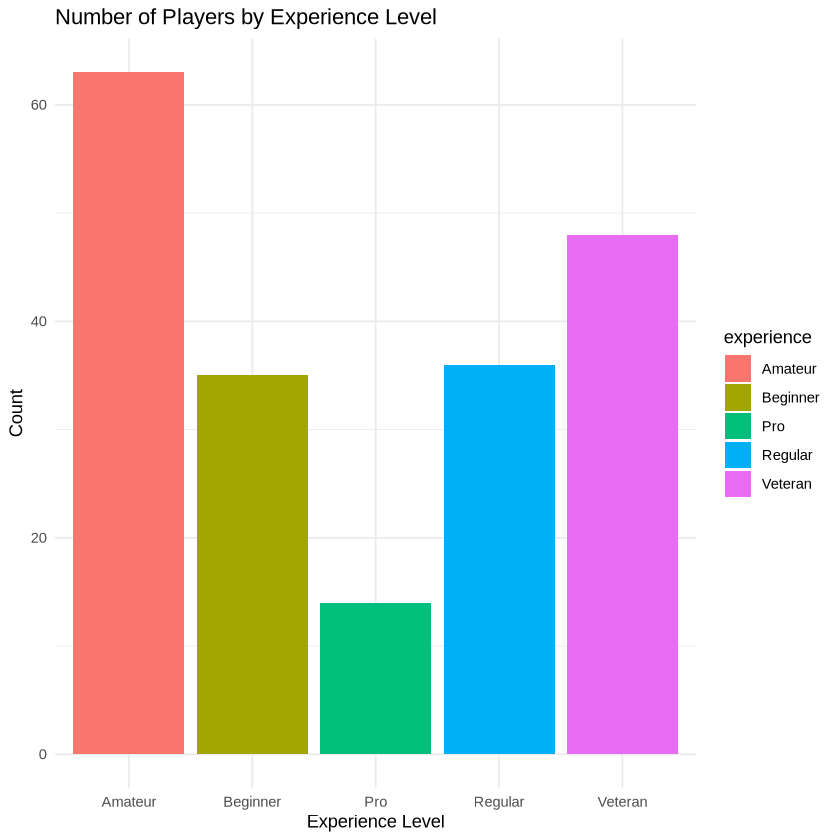

In [9]:
#Player Experience Distribution
ggplot(players, aes(x = experience, fill = experience)) +
  geom_bar() +
  labs(
    title = "Number of Players by Experience Level",
    x = "Experience Level",
    y = "Count"
  ) +
  theme_minimal()

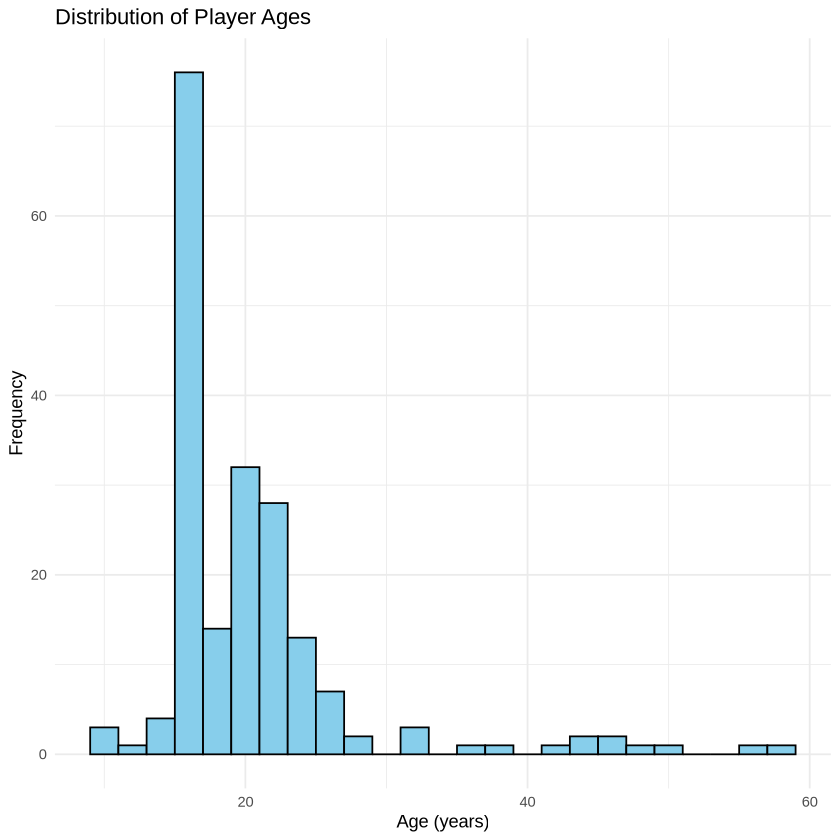

In [10]:
#Age Distribution
ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "skyblue", color = "black", na.rm = TRUE) +
  labs(
    title = "Distribution of Player Ages",
    x = "Age (years)",
    y = "Frequency"
  ) +
  theme_minimal()


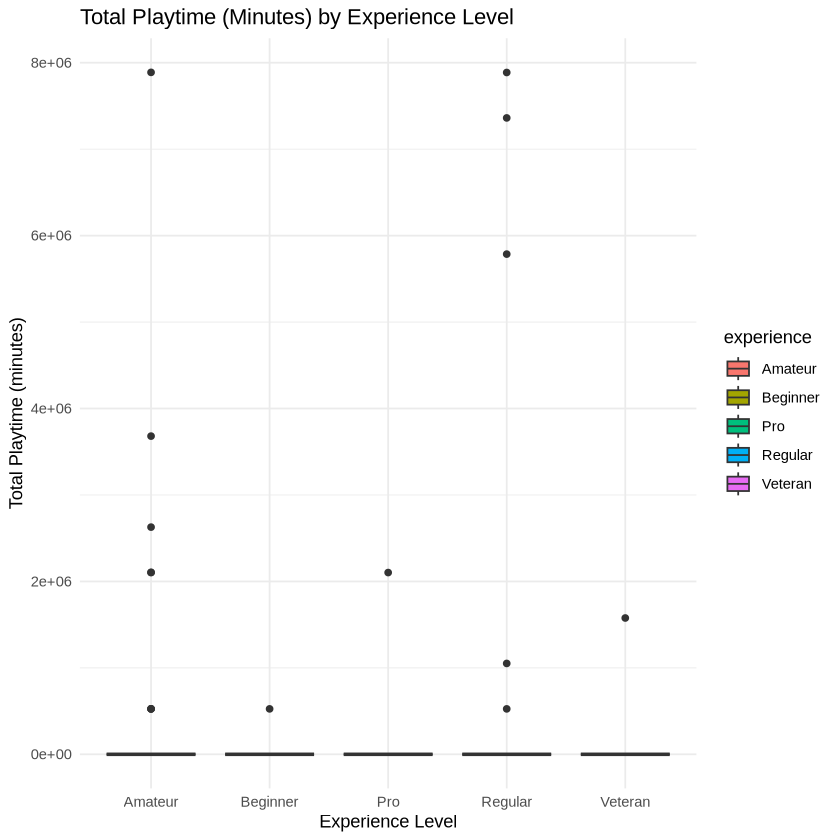

In [11]:
#Experience vs. Total Playtime
ggplot(tidy_data, aes(x = experience, y = total_play_minutes, fill = experience)) +
  geom_boxplot() +
  labs(
    title = "Total Playtime (Minutes) by Experience Level",
    x = "Experience Level",
    y = "Total Playtime (minutes)"
  ) +
  theme_minimal()


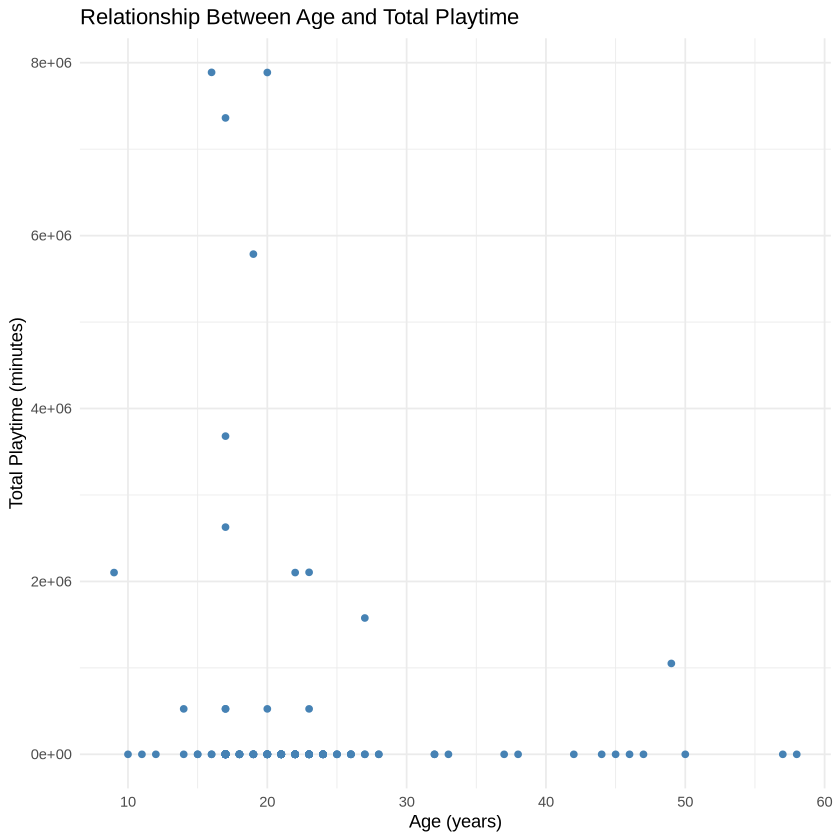

In [12]:
#Age vs. Total Playtime
ggplot(tidy_data, aes(x = Age, y = total_play_minutes)) +
  geom_point(color = "steelblue", na.rm = TRUE) +
  labs(
    title = "Relationship Between Age and Total Playtime",
    x = "Age (years)",
    y = "Total Playtime (minutes)"
  ) +
  theme_minimal()


Insights from Player Experience Distribution: The largest group of players are Amateurs and Veterans, showing that the player base includes both newer and highly experienced users. Pro players are the smallest group, suggesting that relatively few players reach the highest experience level. The fairly even distribution between Beginners and Regular players indicates that many users are in the middle stages of experience progression. This spread of experience levels suggests the dataset includes a balanced mix of skill levels, which is useful for comparing behavioral patterns like playtime across experience categories later.

Insights from Age Distribution: Most players are between 15 and 25 years old, showing that the dataset is dominated by younger participants. Because age and experience may be related (younger players might have less experience), this uneven age distribution could influence total playtime patterns. The small number of older players means that experience-related comparisons might be less reliable for that group. Understanding this age trend helps contextualize whether higher playtime among experienced players is due to skill level or simply more years of gameplay exposure.

Insights from Experience vs Total Playtime: Overall, players with higher experience levels (Regular, Veteran, and Pro) tend to show greater total playtime compared to Amateurs and Beginners. The spread of points within each group suggests large variation in playtime, meaning not all experienced players spend the same amount of time on the server. A few extreme outliers with very high total playtime appear in nearly every group, but they are more common among Veteran and Pro players. This pattern supports the idea that experience level may be a useful predictor of total playtime, but the wide variability indicates that other factors (like age or available time) could also play a role.

Insights from Age vs Total Playtime: There is no strong linear relationship between player age and total playtime; players of many different ages spend similar amounts of time on the server. Most of the very high total playtime values belong to players aged 15–25, which matches the dominant age range in the dataset. Since playtime does not consistently increase with age, age alone does not appear to explain differences in total playtime. This suggests that experience level, rather than age, is a more relevant factor in predicting how long players spend playing, which directly supports the focus of this project.

Methods and Plan

To address the question “Do more experienced players tend to spend more total time playing than less experienced ones?”, I plan to use a K-nearest neighbours (KNN) regression model. This method is appropriate for predicting a quantitative response variable (total playtime in minutes) based on one or more explanatory variables, such as player experience and age. KNN is a flexible, non-parametric model that makes predictions for new observations by averaging the responses of the k most similar data points in the training set. This approach is suitable for the current dataset because total playtime may not have a simple linear relationship with experience or age, and KNN can capture these more complex, local relationships.

Before building the model, I will ensure the data is tidy and properly preprocessed. Numerical variables such as age will be standardized to prevent features measured on different scales from influencing distance calculations. The categorical variable experience will be converted into numeric or dummy-coded form so that it can be incorporated as a predictor. Outliers or missing values will be identified and handled appropriately to improve model accuracy and reliability.

The data will be randomly split into training (80%) and testing (20%) sets, ensuring that the model can be evaluated on unseen data. I will test multiple values of k (for example, 3, 5, 7, and 9) to find the one that minimizes Root Mean Squared Error (RMSE) on the test set. If necessary, cross-validation will be applied to confirm the stability of the chosen model. Model performance will be assessed using RMSE and residual plots to ensure predictions are reasonable and consistent.

Potential limitations of this method include sensitivity to outliers and uneven class representation across experience levels, which could bias predictions. Additionally, KNN performance depends heavily on the choice of k and proper scaling of features. Despite these considerations, KNN regression provides a clear, interpretable, and data-driven way to explore whether players with greater experience tend to spend more total time playing, while accounting for the influence of age.